In [178]:
#LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score,roc_auc_score,classification_report,mean_squared_error,accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')
import sklearn.ensemble as ensemble
import sklearn.metrics as metrics
from lightgbm import LGBMClassifier
import xgboost
from catboost import CatBoostClassifier
from sklearn.linear_model import RidgeClassifier


In [179]:
#READING
train=pd.read_csv('D:/R/JANTA CURFEW/train.csv')
test=pd.read_csv('D:/R/JANTA CURFEW/test.csv')

In [180]:
# BINDING
master=pd.concat([train,test],ignore_index=True)
print(train.shape,test.shape,master.shape)
master.head()

(21000, 25) (9000, 24) (30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0.0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0.0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0.0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1.0
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0.0


In [181]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  int64  
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  int64  
 13  BILL_AMT2                   300

In [182]:
#CHECK NA
master.isnull().sum()/len(master)*100

ID                             0.0
LIMIT_BAL                      0.0
SEX                            0.0
EDUCATION                      0.0
MARRIAGE                       0.0
AGE                            0.0
PAY_0                          0.0
PAY_2                          0.0
PAY_3                          0.0
PAY_4                          0.0
PAY_5                          0.0
PAY_6                          0.0
BILL_AMT1                      0.0
BILL_AMT2                      0.0
BILL_AMT3                      0.0
BILL_AMT4                      0.0
BILL_AMT5                      0.0
BILL_AMT6                      0.0
PAY_AMT1                       0.0
PAY_AMT2                       0.0
PAY_AMT3                       0.0
PAY_AMT4                       0.0
PAY_AMT5                       0.0
PAY_AMT6                       0.0
default_payment_next_month    30.0
dtype: float64

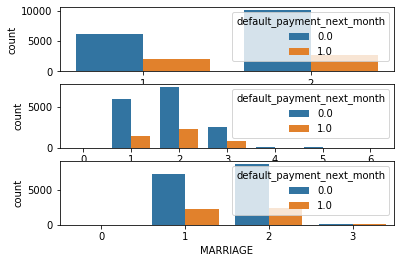

In [183]:
#VISUALISATION#
fig, ax=plt.subplots(3,1)
sns.countplot(x='SEX',data=master,hue='default_payment_next_month', ax=ax[0])
sns.countplot(x='EDUCATION',data=master,hue='default_payment_next_month', ax=ax[1])
sns.countplot(x='MARRIAGE',data=master,hue='default_payment_next_month', ax=ax[2])
fig.show()


In [184]:
#1.Married AS 0 IS UNDOCUMENTED IN PROBLEM STATEMENT
master.MARRIAGE.value_counts()
master.loc[master.MARRIAGE == 0, 'MARRIAGE'] = 3

#2.Education 0,6,5 are also undocumented
fil = (master.EDUCATION == 5) | (master.EDUCATION == 6) | (master.EDUCATION == 0)
master.loc[fil, 'EDUCATION'] = 4

In [168]:
#FIX THE UNDOCUMENTED ACCORDING TO PROBLEM STATEMENT# i.e Payed Duly

ge={'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'}
gs={-2:0,-1:0,0:0}
for col in ge:
    master[col]=master[col].replace(gs)

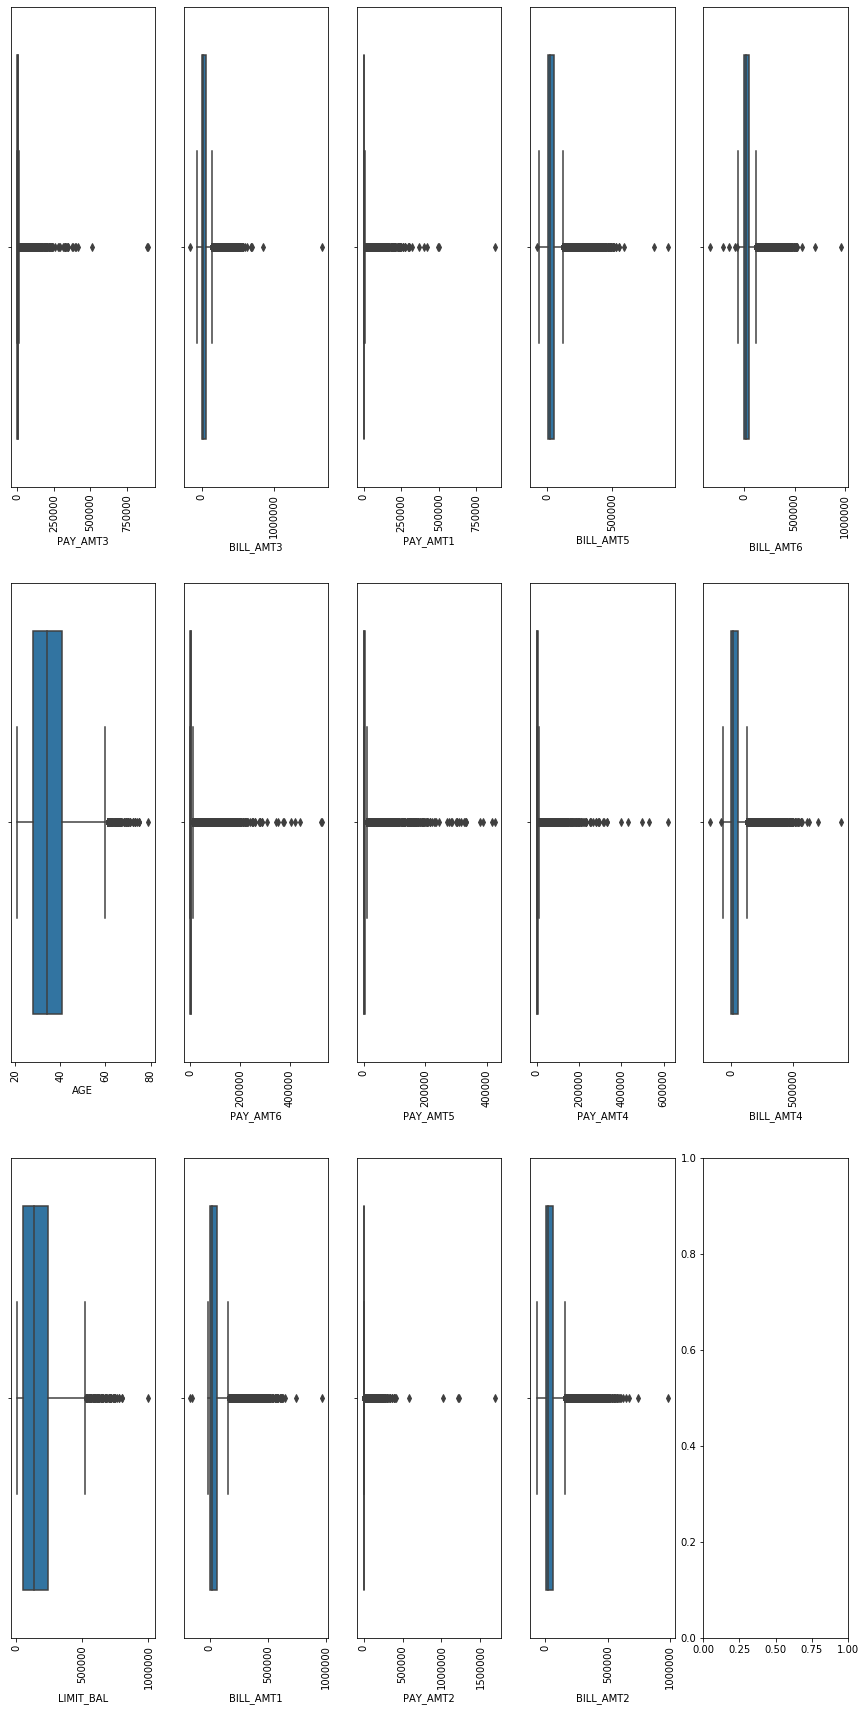

In [195]:
num={'LIMIT_BAL','AGE',
       'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'}

fig, ax=plt.subplots(3,5,figsize=(15,30))
for variable,subplot in zip(num,ax.flatten()):
    sns.boxplot(master[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [196]:
#########FLOORING & CAPPING############

def cap_outliers(series, iqr_threshold=1.5, verbose=False):
    '''Caps outliers to closest existing value within threshold (IQR).'''
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lbound = Q1 - iqr_threshold * IQR
    ubound = Q3 + iqr_threshold * IQR

    outliers = (series < lbound) | (series > ubound)

    series = series.copy()
    series.loc[series < lbound] = series.loc[~outliers].min()
    series.loc[series > ubound] = series.loc[~outliers].max()

    # For comparison purposes.
    if verbose:
            print('\n'.join(
                ['Capping outliers by the IQR method:',
                 f'   IQR threshold: {iqr_threshold}',
                 f'   Lower bound: {lbound}',
                 f'   Upper bound: {ubound}\n']))

    return series

#CAPPING OULIIERS##
for i in num:
    master[i]=cap_outliers(master[i],verbose=True)

Capping outliers by the IQR method:
   IQR threshold: 1.5
   Lower bound: -5782.5
   Upper bound: 10677.5

Capping outliers by the IQR method:
   IQR threshold: 1.5
   Lower bound: -83581.5
   Upper bound: 146412.5

Capping outliers by the IQR method:
   IQR threshold: 1.5
   Lower bound: -5009.0
   Upper bound: 11015.0

Capping outliers by the IQR method:
   IQR threshold: 1.5
   Lower bound: -70878.25
   Upper bound: 122831.75

Capping outliers by the IQR method:
   IQR threshold: 1.5
   Lower bound: -70657.375
   Upper bound: 121111.625

Capping outliers by the IQR method:
   IQR threshold: 1.5
   Lower bound: 8.5
   Upper bound: 60.5

Capping outliers by the IQR method:
   IQR threshold: 1.5
   Lower bound: -5705.625
   Upper bound: 9823.375

Capping outliers by the IQR method:
   IQR threshold: 1.5
   Lower bound: -5416.0
   Upper bound: 9700.0

Capping outliers by the IQR method:
   IQR threshold: 1.5
   Lower bound: -5279.875
   Upper bound: 9589.125

Capping outliers by the IQR

In [197]:
####FEATURE ENGINEERING###
#To me it seems that it goes like that:
#I have a BILL of X, I pay Y
#The month after I have to pay X-Y + X', being X' my new expenses, I pay Y'
#The month after I have to pay X+X' - Y - Y' + X'' , I pay Y''
#So on so forth
#On top of that I may or may not have months of delay.
#It seems that if by september I have a bill too close to my limit, I generally fail. However, I can already see some dramatic exceptions.
#Moreover, I can spot some clients that joined our dataset at a later month: they have 0 in BILL and PAY AMT for a while and then they start. I have to keep that in mind as well.
#Now I want to see how the month of delay gets assigned. To this end, I will consider only people with no delays 6 months ago and see how their payments go.

master['Avg_exp_5'] = ((master['BILL_AMT5'] - (master['BILL_AMT6'] - master['PAY_AMT5']))) / master['LIMIT_BAL']

master['Avg_exp_4'] = (((master['BILL_AMT5'] - (master['BILL_AMT6'] - master['PAY_AMT5'])) +
                 (master['BILL_AMT4'] - (master['BILL_AMT5'] - master['PAY_AMT4']))) / 2) / master['LIMIT_BAL']

master['Avg_exp_3'] = (((master['BILL_AMT5'] - (master['BILL_AMT6'] - master['PAY_AMT5'])) +
                 (master['BILL_AMT4'] - (master['BILL_AMT5'] - master['PAY_AMT4'])) +
                 (master['BILL_AMT3'] - (master['BILL_AMT4'] - master['PAY_AMT3']))) / 3) / master['LIMIT_BAL']

master['Avg_exp_2'] = (((master['BILL_AMT5'] - (master['BILL_AMT6'] - master['PAY_AMT5'])) +
                 (master['BILL_AMT4'] - (master['BILL_AMT5'] - master['PAY_AMT4'])) +
                 (master['BILL_AMT3'] - (master['BILL_AMT4'] - master['PAY_AMT3'])) +
                 (master['BILL_AMT2'] - (master['BILL_AMT3'] - master['PAY_AMT2']))) / 4) / master['LIMIT_BAL']

master['Avg_exp_1'] = (((master['BILL_AMT5'] - (master['BILL_AMT6'] - master['PAY_AMT5'])) +
                 (master['BILL_AMT4'] - (master['BILL_AMT5'] - master['PAY_AMT4'])) +
                 (master['BILL_AMT3'] - (master['BILL_AMT4'] - master['PAY_AMT3'])) +
                 (master['BILL_AMT2'] - (master['BILL_AMT3'] - master['PAY_AMT2'])) +
                 (master['BILL_AMT1'] - (master['BILL_AMT2'] - master['PAY_AMT1']))) / 5) / master['LIMIT_BAL']


master['Closeness_6'] = (master.LIMIT_BAL - master.BILL_AMT6) / master.LIMIT_BAL
master['Closeness_5'] = (master.LIMIT_BAL - master.BILL_AMT5) / master.LIMIT_BAL
master['Closeness_4'] = (master.LIMIT_BAL - master.BILL_AMT4) / master.LIMIT_BAL
master['Closeness_3'] = (master.LIMIT_BAL - master.BILL_AMT3) / master.LIMIT_BAL
master['Closeness_2'] = (master.LIMIT_BAL - master.BILL_AMT2) / master.LIMIT_BAL
master['Closeness_1'] = (master.LIMIT_BAL - master.BILL_AMT1) / master.LIMIT_BAL

ct={'MARRIAGE','EDUCATION','SEX','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'}
for col in ct:
    master[col]=master[col].astype(int)

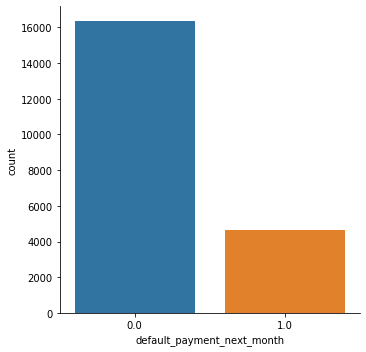

In [154]:
#CHCK TARGET VARIABLE###
sns.catplot(x='default_payment_next_month',kind='count',data=master)

In [198]:
#####MODEL BUILDING####

master=pd.get_dummies(master,columns=ct) 
X=master[master['default_payment_next_month'].isnull()!=True].drop(['ID','default_payment_next_month'],axis=1)
y = master[master['default_payment_next_month'].isnull()!=True]['default_payment_next_month']
X_test=master[master['default_payment_next_month'].isnull()==True].drop(['ID','default_payment_next_month'],axis=1)

print(X.shape,y.shape,X_test.shape)

(21000, 98) (21000,) (9000, 98)


In [199]:
###########SMOTE############3
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)
X=X_smote
y=y_smote
X_trains, X_vals, y_trains, y_vals = train_test_split(X,y, test_size = 0.2, random_state =1)

In [200]:
#declare the models
lr = LogisticRegression()
rf=RandomForestClassifier()
adb=ensemble.AdaBoostClassifier()
bgc=ensemble.BaggingClassifier()
gnb = GaussianNB()
knn=KNeighborsClassifier()
dt = DecisionTreeClassifier()
lg = LGBMClassifier()
xg=xgboost.XGBClassifier()
ct = CatBoostClassifier()
gb=GradientBoostingClassifier()
# ab_rf = AdaBoostClassifier(base_estimator=rf,random_state=0)
# ab_dt = AdaBoostClassifier(base_estimator=dt,random_state=0)
# ab_nb=  AdaBoostClassifier(base_estimator=gnb,random_state=0)
# ab_lr=  AdaBoostClassifier(base_estimator=lr,random_state=0)
bgcl_lr = BaggingClassifier(base_estimator=lr, random_state=0)

# ,ab_rf,ab_dt,ab_nb,ab_lr,bgcl_lr

models=[lr,rf,adb,bgc,gnb,knn,dt,bgcl_lr,lg,xg,ct,gb]
sctr,scte,auc,ps,rs=[],[],[],[],[]
def ens(X_trains,X_vals, y_trains, y_vals):
    for model in models:
            model.fit(X_trains, y_trains)
            y_test_pred = model.predict(X_vals)
            y_test_pred_new=model.predict_proba(X_vals)
            y_test_pred_new=y_test_pred_new[:,1]
            train_score=model.score(X_trains,y_trains)
            test_score=model.score(X_vals,y_vals)
            p_score=metrics.precision_score(y_vals,y_test_pred)
            r_score=metrics.recall_score(y_vals,y_test_pred)
            
            ac=metrics.roc_auc_score(y_vals,y_test_pred_new)
            
            sctr.append(train_score)
            scte.append(test_score)
            ps.append(p_score)
            rs.append(r_score)
            auc.append(ac)
    return sctr,scte,auc,ps,rs
ens(X_trains,X_vals, y_trains, y_vals)
# 'ab_rf','ab_dt','ab_nb','ab_lr','bgcl_lr'
ensemble=pd.DataFrame({'names':['Logistic Regression','Random Forest','Ada boost','Bagging',
                                'Naive-Bayes','KNN','Decistion Tree','LGBMClassifier','XGBClassifier',
                                'bagged LR','CatBoostClassifier','GradientBoostingClassifier'],
                       'auc_score':auc,'training':sctr,'testing':scte,'precision':ps,'recall':rs})
ensemble=ensemble.sort_values(by='auc_score',ascending=False).reset_index(drop=True)
ensemble

Learning rate set to 0.041526
0:	learn: 0.6682653	total: 28.3ms	remaining: 28.3s
1:	learn: 0.6404986	total: 51.7ms	remaining: 25.8s
2:	learn: 0.6214016	total: 77.5ms	remaining: 25.8s
3:	learn: 0.5995628	total: 119ms	remaining: 29.6s
4:	learn: 0.5835775	total: 142ms	remaining: 28.3s
5:	learn: 0.5727026	total: 171ms	remaining: 28.3s
6:	learn: 0.5596796	total: 195ms	remaining: 27.6s
7:	learn: 0.5475205	total: 220ms	remaining: 27.3s
8:	learn: 0.5355336	total: 247ms	remaining: 27.2s
9:	learn: 0.5253010	total: 278ms	remaining: 27.5s
10:	learn: 0.5161585	total: 317ms	remaining: 28.5s
11:	learn: 0.5043770	total: 352ms	remaining: 29s
12:	learn: 0.4968892	total: 395ms	remaining: 30s
13:	learn: 0.4907737	total: 430ms	remaining: 30.3s
14:	learn: 0.4733328	total: 465ms	remaining: 30.5s
15:	learn: 0.4548901	total: 496ms	remaining: 30.5s
16:	learn: 0.4501336	total: 526ms	remaining: 30.4s
17:	learn: 0.4463225	total: 555ms	remaining: 30.3s
18:	learn: 0.4426376	total: 594ms	remaining: 30.7s
19:	learn: 0

,names,auc_score,training,testing,precision,recall
0,Random Forest,0.945593,0.999656,0.883522,0.915755,0.844601
1,XGBClassifier,0.936963,0.899304,0.879089,0.936883,0.812787
2,CatBoostClassifier,0.936935,0.920361,0.878325,0.935234,0.812787
3,GradientBoostingClassifier,0.932106,0.879777,0.872516,0.933428,0.802080
4,bagged LR,0.931480,0.879930,0.872516,0.932812,0.802692
5,Ada boost,0.925628,0.873471,0.870682,0.921685,0.810034
6,Bagging,0.925090,0.990179,0.866096,0.919972,0.801774
7,KNN,0.831739,0.834378,0.751758,0.704246,0.867544
8,Decistion Tree,0.820498,0.999656,0.820544,0.814281,0.830223
9,Naive-Bayes,0.663907,0.608186,0.610517,0.582287,0.780361


In [202]:
##RANDOM FOREST##
randomforest = RandomForestClassifier(n_estimators=1000, oob_score=True)
randomforest.fit(X_trains,y_trains)
pred=randomforest.predict(X_vals)
randomforest.score(X_trains,y_trains)
accuracy=round(randomforest.score(X_trains, y_trains) * 100, 2)
print(accuracy)
print(classification_report(y_vals,pred))
print("oob score:", round(randomforest.oob_score_, 4)*100, "%")


99.97
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      3273
         1.0       0.92      0.85      0.88      3269

    accuracy                           0.89      6542
   macro avg       0.89      0.89      0.89      6542
weighted avg       0.89      0.89      0.89      6542

oob score: 88.67 %


In [203]:
##RANDOM SEARCH CV###

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfs = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rfs, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_trains, y_trains)
rf_random.best_params_

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 47.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 80.5min finished


{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

In [204]:
# MAKE RF BASE ON THAT PARAMETER####
rfs = RandomForestClassifier(n_estimators=1400,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= 40,
 bootstrap= False)


rfs.fit(X_trains, y_trains)
Y_prtus = rfs.predict(X_vals)
rfs.score(X_trains, y_trains)
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(rfs, X_trains, y_trains, cv=3)
confusion_matrix(y_trains, predictions)
print(classification_report(y_vals,Y_prtus))
acc_rf = round(rfs.score(X_trains, y_trains) * 100, 2)
print(acc_rf)
print("oob score:", round(rf.oob_score_, 4)*100, "%")

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89      3273
         1.0       0.92      0.85      0.88      3269

    accuracy                           0.89      6542
   macro avg       0.89      0.89      0.89      6542
weighted avg       0.89      0.89      0.89      6542

99.97


AttributeError: 'RandomForestClassifier' object has no attribute 'oob_score_'

In [205]:
#Print Feature Importance:
#######GBM IMPORTANCES####
importances = pd.DataFrame({'feature':X_trains.columns,'importance':np.round(rfs.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
PAY_0_0,0.074
LIMIT_BAL,0.031
PAY_2_0,0.029
Closeness_1,0.028
AGE,0.027
Closeness_2,0.026
PAY_AMT1,0.025
PAY_AMT2,0.024
Closeness_3,0.024


In [209]:
prediction = rfs.predict(X_test)
submission = pd.DataFrame()
submission['ID'] = master[master['default_payment_next_month'].isnull()==True]['ID']
submission['default_payment_next_month'] = prediction
submission.to_csv('fisk.csv', index=False, header=True)
submission.shape


(9000, 2)